<a href="https://colab.research.google.com/github/galib-1206/Machine-Learning-Basics/blob/main/LSTMp3_1206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature Forecasting performance using LSTM model

### Installing Dependencies

In [ ]:
# Install TensorFlow
!pip install tensorflow

# Install numpy, pandas, Matplotlib for
!pip install numpy pandas matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

### Dataset Creation
This tutorial creates a hand-crafted dataset.

In [ ]:
# Sample dataset
temperature_data = np.array([20, 21, 22, 24, 27, 30, 32, 33, 35, 34, 32, 29, 25, 22, 21, 20, 18, 17, 16, 15])

In [ ]:
# Splitting the data into training and testing sets
train_size = int(len(temperature_data) * 0.67)
train_data, test_data = temperature_data[0:train_size], temperature_data[train_size:]

# Normalize the data
train_data = (train_data - np.min(train_data)) / (np.max(train_data) - np.min(train_data))
test_data = (test_data - np.min(test_data)) / (np.max(test_data) - np.min(test_data))

# Function to create sequences from the data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Choose a sequence length (e.g., 5 days)
seq_length = 5
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

### Training

In [ ]:
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(50, input_shape=(seq_length, 1)))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print a summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
8/8 - 2s - 226ms/step - loss: 0.5296
Epoch 2/100
8/8 - 0s - 5ms/step - loss: 0.3265
Epoch 3/100
8/8 - 0s - 5ms/step - loss: 0.1925
Epoch 4/100
8/8 - 0s - 12ms/step - loss: 0.1343
Epoch 5/100
8/8 - 0s - 11ms/step - loss: 0.1072
Epoch 6/100
8/8 - 0s - 19ms/step - loss: 0.1028
Epoch 7/100
8/8 - 0s - 8ms/step - loss: 0.0951
Epoch 8/100
8/8 - 0s - 18ms/step - loss: 0.0907
Epoch 9/100
8/8 - 0s - 20ms/step - loss: 0.0855
Epoch 10/100
8/8 - 0s - 20ms/step - loss: 0.0824
Epoch 11/100
8/8 - 0s - 18ms/step - loss: 0.0773
Epoch 12/100
8/8 - 0s - 12ms/step - loss: 0.0740
Epoch 13/100
8/8 - 0s - 8ms/step - loss: 0.0719
Epoch 14/100
8/8 - 0s - 22ms/step - loss: 0.0676
Epoch 15/100
8/8 - 0s - 21ms/step - loss: 0.0695
Epoch 16/100
8/8 - 0s - 45ms/step - loss: 0.0608
Epoch 17/100
8/8 - 0s - 11ms/step - loss: 0.0589
Epoch 18/100
8/8 - 0s - 21ms/step - loss: 0.0553
Epoch 19/100
8/8 - 0s - 26ms/step - loss: 0.0515
Epoch 20/100
8/8 - 0s - 36ms/step - loss: 0.0502
Epoch 21/100
8/8 - 0s - 15ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


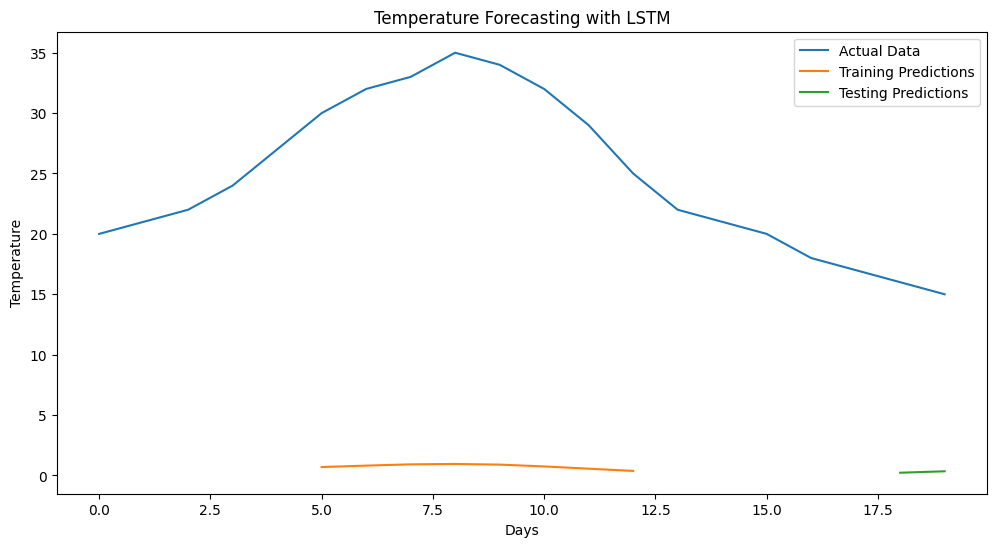

In [ ]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get them in the original scale
train_predict = (train_predict * (np.max(train_data) - np.min(train_data))) + np.min(train_data)
test_predict = (test_predict * (np.max(test_data) - np.min(test_data))) + np.min(test_data)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Actual Data')
plt.plot(range(seq_length, train_size), train_predict, label='Training Predictions')
plt.plot(range(train_size + seq_length, len(temperature_data)), test_predict, label='Testing Predictions')
plt.legend()
plt.title('Temperature Forecasting with LSTM')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()

From the performance graph above, a really poor performance is observed in the tutorial dataset.